In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [4]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

result_ = np.array(result_scaled)

In [5]:
result_.shape

(1980, 256)

In [6]:
data = result_.reshape(result_.shape[0], 1, result_.shape[1])
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

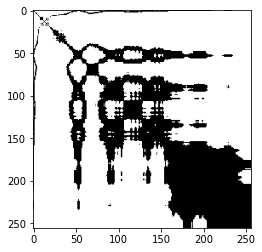

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')

In [8]:
learning_rate = 3e-4
optimizer='Adam'
loss='mse'
image_size = 256 #1024, 256
dimension = 16 # ...

In [9]:
from utils import split_data, normalization_tool
from agent import Autoencoder_Agent

X_train, X_test, Y_train, Y_test = split_data(X_scaled, X_scaled) #데이터 분리

autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     1280      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        1

In [10]:
batch_size = 5
epochs = 10

In [ ]:
hist = autoencoder.train(X_train,batch_size,epochs,X_test)

Epoch 1/10
297/297 [==============================] - 23s 79ms/step - loss: 0.2113 - val_loss: 0.2079
Epoch 2/10
297/297 [==============================] - 23s 78ms/step - loss: 0.2073 - val_loss: 0.2071
Epoch 3/10
297/297 [==============================] - 23s 78ms/step - loss: 0.2065 - val_loss: 0.2060
Epoch 4/10
297/297 [==============================] - 23s 78ms/step - loss: 0.2026 - val_loss: 0.1983
Epoch 5/10
297/297 [==============================] - 23s 78ms/step - loss: 0.1959 - val_loss: 0.1939
Epoch 6/10
297/297 [==============================] - 23s 78ms/step - loss: 0.1935 - val_loss: 0.1926
Epoch 7/10
297/297 [==============================] - 23s 78ms/step - loss: 0.1916 - val_loss: 0.1914
Epoch 8/10
297/297 [==============================] - 23s 78ms/step - loss: 0.1899 - val_loss: 0.1902
Epoch 9/10
 44/297 [===>..........................] - ETA: 17s - loss: 0.1908

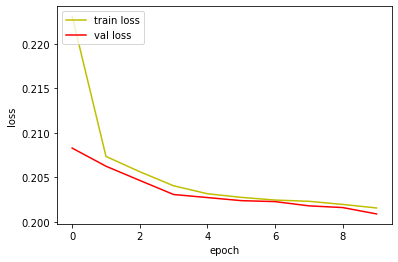

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.plot([hist['loss'][i] - hist['val_loss'][i] for i in range(len(hist['loss']))], 'g', label='loss - val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [19]:
feature = autoencoder.feature_extract(X_scaled)

ResourceExhaustedError: OOM when allocating tensor with shape[495,256,256,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D]